<a href="https://colab.research.google.com/github/cjm10979/ThinkStats2/blob/master/Ford_trips.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bring in the CSV file and do QA checks


In [ ]:
import pandas as pd 
import numpy as np

from datetime import datetime

#create a lambda function to enable datetime imports
dateparse = lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S.%f')

#read in the CSV file with a date parser for the date time fields
df = pd.read_csv("/content/sample_data/2017-fordgobike-tripdata.csv",
                  parse_dates=['start_time','end_time'], date_parser = dateparse)

# check the data types of each field to ensure it makes sense
df.info()
# Also each field has a full set of data with no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             519700 non-null  int64         
 1   start_time               519700 non-null  datetime64[ns]
 2   end_time                 519700 non-null  datetime64[ns]
 3   start_station_id         519700 non-null  int64         
 4   start_station_name       519700 non-null  object        
 5   start_station_latitude   519700 non-null  float64       
 6   start_station_longitude  519700 non-null  float64       
 7   end_station_id           519700 non-null  int64         
 8   end_station_name         519700 non-null  object        
 9   end_station_latitude     519700 non-null  float64       
 10  end_station_longitude    519700 non-null  float64       
 11  bike_id                  519700 non-null  int64         
 12  user_type       

In [ ]:
# Check how the data looks
df.head(10)
# At first glance the data looks ok and well formated

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer
2,45768,2017-12-31 22:45:48.411,2018-01-01 11:28:36.883,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer
3,62172,2017-12-31 17:31:10.636,2018-01-01 10:47:23.531,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer
4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber
5,9226,2017-12-31 22:51:00.918,2018-01-01 01:24:47.166,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,1487,Customer
6,4507,2017-12-31 23:49:28.422,2018-01-01 01:04:35.619,259,Addison St at Fourth St,37.866249,-122.299371,259,Addison St at Fourth St,37.866249,-122.299371,3539,Customer
7,4334,2017-12-31 23:46:37.196,2018-01-01 00:58:51.211,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,1503,Customer
8,4150,2017-12-31 23:37:07.548,2018-01-01 00:46:18.308,20,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,20,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,3125,Customer
9,4238,2017-12-31 23:35:38.145,2018-01-01 00:46:17.053,20,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,20,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,2543,Customer


In [ ]:
# Check that there are no duplicates since there is no trip_id
# the data shouls be unique on start_time & bike_id

df_check = df[df.duplicated()]
print(len(df_check))

# Since the output is 0, this means there are no duplicate rows per start_time & bike_id

0


How many trips were taken?

In [ ]:
# since there are no duplicates in the data this is just the length of the dataframe
print("The number of trips in this data set is: " + str(len(df)))

The number of trips in this data set is: 519700


When was the earliest check-out in the data set?

In [ ]:
# Since the start_time is in a timestamp format this should be the minimum value
print("The earliest check-out in the data set was: " + str(min(df.start_time)))

The earliest check-out in the data set was: 2017-06-28 09:47:36.347000


When was the last bike checked in?

In [ ]:
# Since the end_date is in a timestamp format this should be the maximum value
print("The last bike was checked in at: " + str(max(df.end_time)))

The last bike was checked in at: 2018-01-01 15:12:50.245000


How long was the longest trip (in duration)?

In [ ]:
# Since duraction_sec is formated as an integer, this would be the maximum value
print("The longest trip is duration was: " + str(max(df.duration_sec)) + ' seconds')
print("The longest trip is duration was: " + str(np.floor(max(df.duration_sec)/60)) + ' minutes')
print("The longest trip is duration was: " + str(np.round(max(df.duration_sec/60/60), 2)) + ' hours')

The longest trip is duration was: 86369 seconds
The longest trip is duration was: 1439.0 minutes
The longest trip is duration was: 23.99 hours


{'boxes': [<matplotlib.lines.Line2D at 0x7fb54b548710>],
 'caps': [<matplotlib.lines.Line2D at 0x7fb54d76d160>,
 'fliers': [],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fb54d76d860>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fb54b548a20>,
  <matplotlib.lines.Line2D at 0x7fb54b548da0>]}

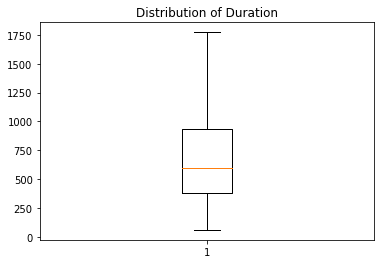

In [ ]:
#look at the distribution of duration removing the outliers
import matplotlib.pyplot as plt

fig1, ax1 = plt.subplots()
ax1.set_title('Distribution of Duration')
ax1.boxplot(df.duration_sec,  showfliers=False)

The box plot shows that the median duration is around 600 seconds and there a validity of one duration over 86k is highly suspicious.

Perhaps the bike was stolen or the docking station had a fault.

What are the other distribution stats for this variable?

In [ ]:
df.duration_sec.describe()

count    519700.000000
mean       1099.009521
std        3444.146451
min          61.000000
25%         382.000000
50%         596.000000
75%         938.000000
max       86369.000000
Name: duration_sec, dtype: float64

Also, there are no negative durations. This is a good sign that daylight savings time changes did not adversely affect this data. Although a time change did occur in this time period it would be better to use UTC formating for the San Francisco location to ensure that supurious data does not arise as a consequence of clock changes.

How long was the shortest trip?

In [ ]:
print("The shortest trip is duration was: " + str(min(df.duration_sec)) + ' seconds')

The shortest trip is duration was: 61 seconds


Again this seems a really short time - maybe there was an error with start time or end time of the docking station. If it really was a short journey this could be checked by examining the start & end stations to see if they are really close.

How many stations are there?

In [ ]:
# This can be checked by examining the number of start stations and end stations
print("The number of unique start stations are: " + str(len(df.start_station_id.unique())))

The number of unique start stations are: 272


In [ ]:
# Find the number of end stations
print("The number of unique end stations are: " + str(len(df.end_station_id.unique())))

The number of unique end stations are: 272


In [ ]:
# Are these actually the same 272 stations or different ones?
# Each set of start and end stations needs to be sorted in the same way
end=df['end_station_id'].unique()
end = np.sort(end)

In [ ]:
start = df['start_station_id'].unique()
start= np.sort(start)

In [ ]:
np.array_equal(start,end)
# Since this value is true it means that the start station are the same as the end stations

True

In [ ]:
print("The number of stations (either start or end) are: " + str(len(df.start_station_id.unique())))

The number of stations (either start or end) are: 272


How many stations were active in the first 30 days of service?

In [ ]:
# First find the date of the first day of service
# Then find the date 30 days later + adjust so the period ends just before midnight
# To cover for a full day
import datetime


start_date = min(df['start_time'])
end_date30 = start_date + datetime.timedelta(days=30, hours=14, minutes=12, seconds=23)

print("The first day of service was: " + str(start_date) + " and 30 days later it was: " + str(end_date30))

The first day of service was: 2017-06-28 09:47:36.347000 and 30 days later it was: 2017-07-28 23:59:59.347000


In [ ]:
# Now use these dates to subset the df
first_30 = df[(df['start_time'] >= start_date) & (df['start_time'] <= end_date30)]

# Now find the unqiue number of start_station_ids

print("The number of stations that were active in the first 30 days were: " + str(len(first_30.start_station_id.unique())))


The number of stations that were active in the first 30 days were: 147


How many stations were active in the last month of service

In [ ]:
# First find the date of the last day of service 
# And then go back to the December 1st to get the last month
last_day = max(df['start_time'])
first_day = last_day + datetime.timedelta(days=-31, minutes= 1)

print("The last_day of service was: " + str(last_day) + " and the start of the month was: " + str(first_day))


The last_day of service was: 2017-12-31 23:59:01.261000 and the start of the month was: 2017-12-01 00:00:01.261000


In [ ]:
# Now use these dates to subset the df
last_30 = df[(df['start_time'] >= first_day) & (df['start_time'] <= last_day)]

# Now find the unqiue number of start_station_ids

print("The number of stations that were active in December were: " + str(len(last_30.start_station_id.unique())))


The number of stations that were active in December were: 267


Between which two stations were the most journeys?

In [ ]:
# Create a new field which is a concatenation of the start_station_id and the end_station_id
df['journey'] = df['start_station_id'].astype(str) + '_' + df['end_station_id'].astype(str)
df.journey.head()

0      74_43
1     284_96
2    245_245
3       60_5
4    239_247
Name: journey, dtype: object

In [ ]:
journey_counts = df.journey.value_counts(normalize=True, ascending=False)

In [ ]:
journey_counts

15_6       0.006434
6_16       0.003450
6_15       0.003337
81_15      0.003244
48_21      0.002904
             ...   
112_101    0.000002
190_215    0.000002
126_29     0.000002
159_234    0.000002
267_180    0.000002
Name: journey, Length: 20027, dtype: float64

The most frequent journey is from start station 15 to end station 6.
What are these locations in English?

In [ ]:
start_station = df['start_station_name'][(df['start_station_id'] == 15)].unique()

print("The most journeys started at: " + str(start_station).strip('[]'))

The most journeys started at: 'San Francisco Ferry Building (Harry Bridges Plaza)'


In [ ]:
end_station =df['end_station_name'][(df['end_station_id'] == 6)].unique()
print("The most journeys ended at: " + str(end_station).strip('[]'))

The most journeys ended at: 'The Embarcadero at Sansome St'


In [ ]:
print('Therefore the most common journey combination was from' + str(start_station).strip('[]') +
'to ' + str(end_station).strip('[]') )

Therefore the most common journey combination was from'San Francisco Ferry Building (Harry Bridges Plaza)'to 'The Embarcadero at Sansome St'


what are the most common journeys for Subscribers?


In [ ]:
# Subset the data frame to only get subscribers
subscribers = df[df['user_type'] == 'Subscriber']
# Now work out the most prevalent journeys for Subscribers
subscribers.journey.value_counts(normalize=False, ascending=False)

15_6       1697
6_16       1616
81_15      1499
48_21      1478
21_48      1437
           ... 
213_224       1
154_162       1
80_10         1
156_218       1
223_147       1
Name: journey, Length: 18430, dtype: int64

In [ ]:
# Subset the data frame to only get customers
customers = df[df['user_type'] == 'Customer']
# Now work out the most prevalent journeys for customers
customers.journey.value_counts(normalize=False, ascending=False)

15_6       1647
6_6        1048
6_15        710
15_15       690
70_70       621
           ... 
144_3         1
80_56         1
71_107        1
108_59        1
108_120       1
Name: journey, Length: 14830, dtype: int64

In [ ]:
print("Both customers and subscribers have the most prevalent journey time of: ")
print(str(start_station).strip('[]') + "to " + str(end_station).strip('[]'))

Both customers and subscribers have the most prevalent journey time of: 
'San Francisco Ferry Building (Harry Bridges Plaza)'to 'The Embarcadero at Sansome St'


Both Subscribers & Customers have the most prevalent journey type of San Francisco Ferry Building (Harrry Bridges Plaza) to The Embarcadero at Sansome St.

However, there are quite a few more customer journeys for Subscribers compared to Customers (18430 v 14830).

I would want to look at the time of day, day of week and month to understand whether subscribers and customers are using the service at the same time to ensure that availabilty of the bikes does not become an issue.

It maybe a good idea to use a sankey chart to gain further understanding of the key start & end stations from a more visual perspective.